In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [56]:
data=pd.read_csv("Mall_Customers.csv")

In [57]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [58]:
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [59]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [61]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [62]:
x=data.iloc[:,[3,4]].values

In [63]:
ks=range(1,10)
intertias=[]           # WCSS
for k in ks: 
    model=KMeans(n_clusters=k,random_state=42)   # Model the means
    model.fit(x)                                 # x=data.iloc[:,[3,4]].values
    intertias.append(model.inertia_)             # Appending the inertia values

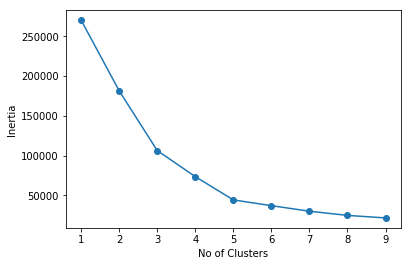

In [64]:
plt.plot(ks,intertias,"-o")
plt.xlabel("No of Clusters")
plt.xticks(ks)
plt.ylabel("Inertia")
plt.show()  

In [65]:
# Model the Kmeans with cluster values found in elbow 
model=KMeans(n_clusters=5,random_state=42) 
model.fit(x)
labels=model.predict(x)
labels

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [66]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [67]:
x[labels==0,0]

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76], dtype=int64)

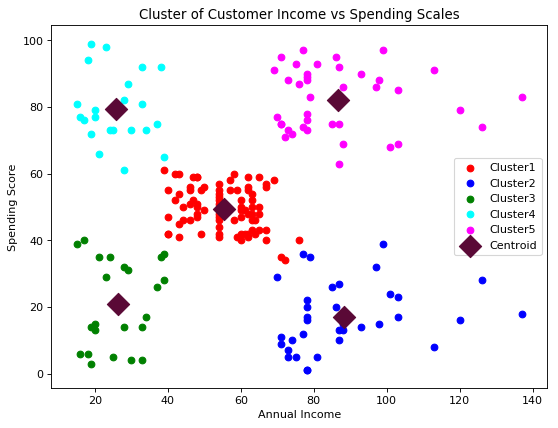

In [68]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(x[labels==0,0],x[labels==0,1],c='red',label='Cluster1')
plt.scatter(x[labels==1,0],x[labels==1,1],c='blue',label='Cluster2')
plt.scatter(x[labels==2,0],x[labels==2,1],c='green',label='Cluster3')
plt.scatter(x[labels==3,0],x[labels==3,1],c='cyan',label='Cluster4')
plt.scatter(x[labels==4,0],x[labels==4,1],c='magenta',label='Cluster5')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 200, c='#5a0936', marker='D',label='Centroid')
plt.title("Cluster of Customer Income vs Spending Scales")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

# Dentogram of the Customer Data

In [69]:
import scipy.cluster.hierarchy as sch

In [70]:
sch.linkage(x,method="ward")    # ward minimizes WCSS

array([[ 65.        ,  68.        ,   0.        ,   2.        ],
       [ 48.        ,  49.        ,   0.        ,   2.        ],
       [156.        , 158.        ,   0.        ,   2.        ],
       [129.        , 131.        ,   0.        ,   2.        ],
       [ 21.        ,  23.        ,   1.        ,   2.        ],
       [ 51.        ,  53.        ,   1.        ,   2.        ],
       [ 60.        ,  61.        ,   1.        ,   2.        ],
       [ 67.        ,  69.        ,   1.        ,   2.        ],
       [ 64.        ,  66.        ,   1.        ,   2.        ],
       [ 79.        ,  82.        ,   1.        ,   2.        ],
       [ 74.        ,  85.        ,   1.        ,   2.        ],
       [ 78.        ,  80.        ,   1.        ,   2.        ],
       [ 75.        ,  81.        ,   1.        ,   2.        ],
       [ 92.        ,  97.        ,   1.        ,   2.        ],
       [101.        , 109.        ,   1.        ,   2.        ],
       [107.        , 113

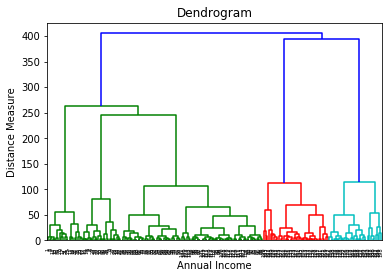

In [71]:
dendogram=sch.dendrogram(sch.linkage(x,method="ward"))
plt.title("Dendrogram")
plt.xlabel("Annual Income")
plt.ylabel("Distance Measure")
plt.show()

# Agglomerative Clustering

In [72]:
from sklearn.cluster import AgglomerativeClustering            

In [73]:
model_h=AgglomerativeClustering(n_clusters=5,linkage="ward")

In [74]:
model_h

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func='deprecated')

In [75]:
hc=model_h.fit_predict(x)                   # Fit and Predict

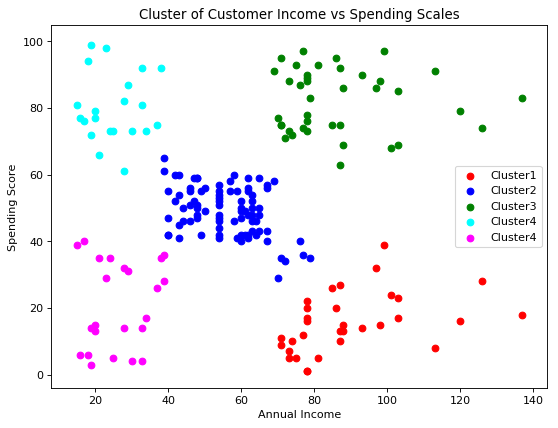

In [76]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(x[hc==0,0],x[hc==0,1],c='red',label='Cluster1')
plt.scatter(x[hc==1,0],x[hc==1,1],c='blue',label='Cluster2')
plt.scatter(x[hc==2,0],x[hc==2,1],c='green',label='Cluster3')
plt.scatter(x[hc==3,0],x[hc==3,1],c='cyan',label='Cluster4')
plt.scatter(x[hc==4,0],x[hc==4,1],c='magenta',label='Cluster4')

plt.title("Cluster of Customer Income vs Spending Scales")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

#  Wine Dataset


In [77]:
data=pd.read_csv("wineQualityReds.csv")

In [78]:
data.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [79]:
data.drop(columns='Unnamed: 0',inplace=True)

In [80]:
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [81]:
data.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed.acidity           1599 non-null float64
volatile.acidity        1599 non-null float64
citric.acid             1599 non-null float64
residual.sugar          1599 non-null float64
chlorides               1599 non-null float64
free.sulfur.dioxide     1599 non-null float64
total.sulfur.dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [83]:
data.dtypes

fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [84]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed.acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile.acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric.acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual.sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free.sulfur.dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total.sulfur.dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [85]:
x=data.iloc[:,0:12].values

In [86]:
ks=range(1,10)
intertias=[]          
for k in ks: 
    model=KMeans(n_clusters=k,random_state=42)   # Model the means
    model.fit(x)                                 # x=data.iloc[:,[3,4]].values
    intertias.append(model.inertia_) 

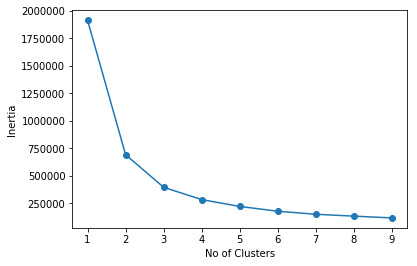

In [87]:
plt.plot(ks,intertias,"-o")
plt.xlabel("No of Clusters")
plt.xticks(ks)
plt.ylabel("Inertia")
plt.show()

In [88]:
model=KMeans(n_clusters=4,random_state=42) 
model.fit(x)
labels=model.predict(x)
labels

array([0, 1, 2, ..., 2, 2, 2])

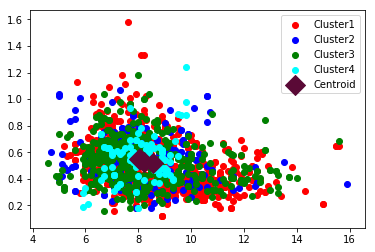

In [89]:
plt.scatter(x[labels==0,0],x[labels==0,1],c='red',label='Cluster1')
plt.scatter(x[labels==1,0],x[labels==1,1],c='blue',label='Cluster2')
plt.scatter(x[labels==2,0],x[labels==2,1],c='green',label='Cluster3')
plt.scatter(x[labels==3,0],x[labels==3,1],c='cyan',label='Cluster4')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 200, c='#5a0936', marker='D',label='Centroid')
plt.legend()
plt.show()

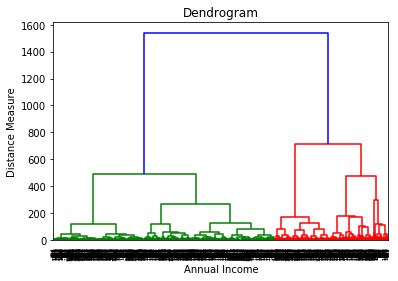

In [90]:
dendogram=sch.dendrogram(sch.linkage(x,method="ward"))
plt.title("Dendrogram")
plt.xlabel("Annual Income")
plt.ylabel("Distance Measure")
plt.show()

In [91]:
model_h=AgglomerativeClustering(n_clusters=4,linkage="ward")
hc=model_h.fit_predict(x)     

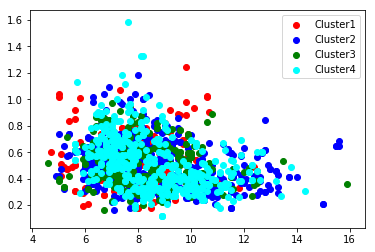

In [92]:
plt.scatter(x[hc==0,0],x[hc==0,1],c='red',label='Cluster1')
plt.scatter(x[hc==1,0],x[hc==1,1],c='blue',label='Cluster2')
plt.scatter(x[hc==2,0],x[hc==2,1],c='green',label='Cluster3')
plt.scatter(x[hc==3,0],x[hc==3,1],c='cyan',label='Cluster4')


plt.legend()
plt.show()

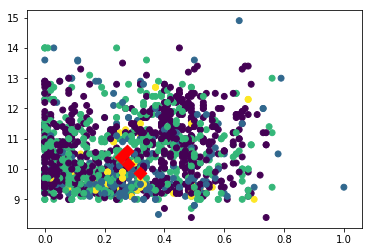

In [93]:
centroids = model.cluster_centers_
centroid_x=centroids[:,2]
centroid_y=centroids[:,10]
xs=data.iloc[:,2]
ys=data.iloc[:,10]

plt.scatter(xs,ys,c=labels,s=35)
plt.scatter(centroid_x,centroid_y,marker="D",c="r",s=80)
plt.show()

# Diabetes Dataset

In [94]:
data=pd.read_csv("diabetes.csv")

In [95]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [96]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [97]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [99]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [100]:
x=data.iloc[:,0:8].values

In [101]:
ks=range(1,10)
intertias=[]          
for k in ks: 
    model=KMeans(n_clusters=k,random_state=42)   
    model.fit(x)                                 
    intertias.append(model.inertia_) 

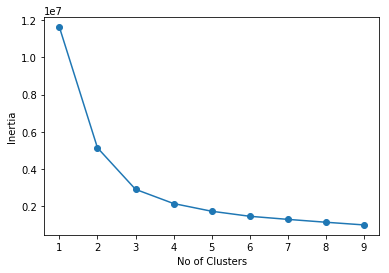

In [102]:
plt.plot(ks,intertias,"-o")
plt.xlabel("No of Clusters")
plt.xticks(ks)
plt.ylabel("Inertia")
plt.show()

In [103]:
model=KMeans(n_clusters=3,random_state=42) 
model.fit(x)
labels=model.predict(x)
labels

array([0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 1,
       0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2,
       1, 2, 0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 0, 0,

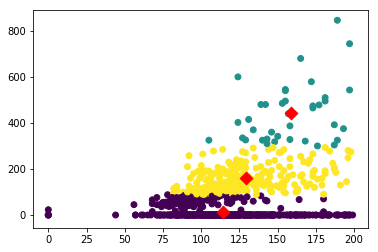

In [104]:
centroids = model.cluster_centers_
centroid_x=centroids[:,1]
centroid_y=centroids[:,4]
xs=data.iloc[:,1]
ys=data.iloc[:,4]

plt.scatter(xs,ys,c=labels,s=35)
plt.scatter(centroid_x,centroid_y,marker="D",c="r",s=80)
plt.show()

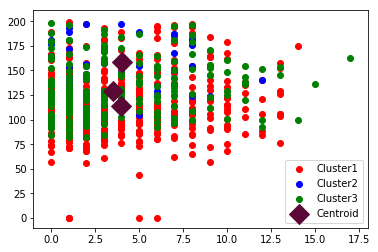

In [105]:
plt.scatter(x[labels==0,0],x[labels==0,1],c='red',label='Cluster1')
plt.scatter(x[labels==1,0],x[labels==1,1],c='blue',label='Cluster2')
plt.scatter(x[labels==2,0],x[labels==2,1],c='green',label='Cluster3')
#plt.scatter(x[labels==3,0],x[labels==3,1],c='cyan',label='Cluster4')


plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 200, c='#5a0936', marker='D',label='Centroid')
plt.legend()
plt.show()

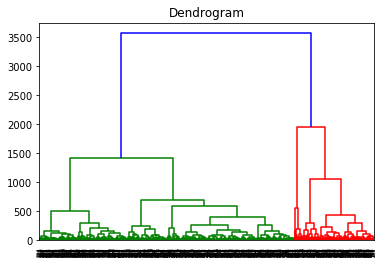

In [106]:
dendogram=sch.dendrogram(sch.linkage(x,method="ward"))
plt.title("Dendrogram")
plt.show()

In [107]:
model_h=AgglomerativeClustering(n_clusters=4,linkage="ward")
hc=model_h.fit_predict(x)     

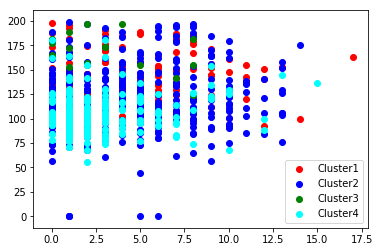

In [108]:
plt.scatter(x[hc==0,0],x[hc==0,1],c='red',label='Cluster1')
plt.scatter(x[hc==1,0],x[hc==1,1],c='blue',label='Cluster2')
plt.scatter(x[hc==2,0],x[hc==2,1],c='green',label='Cluster3')
plt.scatter(x[hc==3,0],x[hc==3,1],c='cyan',label='Cluster4')

plt.legend()
plt.show()

In [109]:
# Dendogram

In [110]:
from scipy.cluster.hierarchy import dendrogram

In [111]:
z=sch.linkage(data.drop("Outcome",axis=1),method='single')

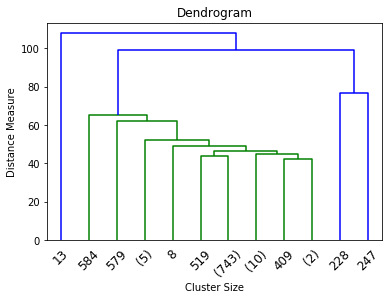

In [112]:
dendogram = sch.dendrogram(z,orientation="top",truncate_mode="lastp",p=12,leaf_rotation=45)
plt.title("Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance Measure")
plt.show()

In [113]:
z=sch.linkage(data.drop("Outcome",axis=1),method='complete')

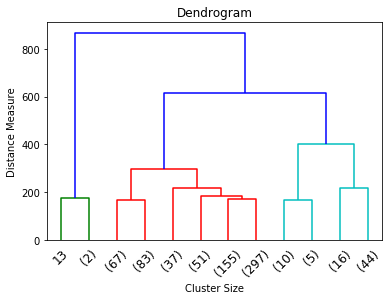

In [114]:
dendogram = sch.dendrogram(z,orientation="top",truncate_mode="lastp",p=12,leaf_rotation=45)
plt.title("Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance Measure")
plt.show()

In [115]:
z=sch.linkage(data.drop("Outcome",axis=1),method='ward')

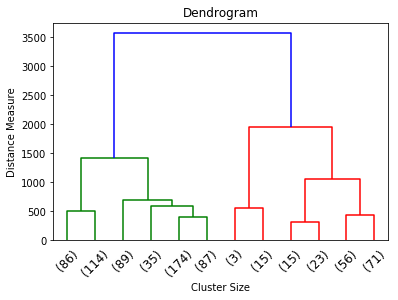

In [116]:
dendogram = sch.dendrogram(z,orientation="top",truncate_mode="lastp",p=12,leaf_rotation=45)
plt.title("Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance Measure")
plt.show()

In [117]:
z=sch.linkage(data.drop("Outcome",axis=1),method='average')

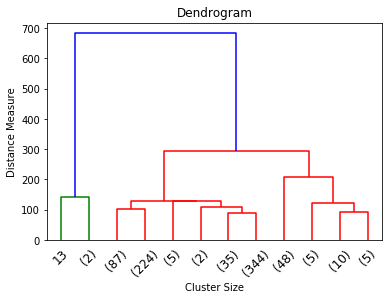

In [118]:
dendogram = sch.dendrogram(z,orientation="top",truncate_mode="lastp",p=12,leaf_rotation=45)
plt.title("Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance Measure")
plt.show()

# MNIST Data

In [119]:
df=pd.read_csv("train.csv")

In [120]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
df.shape

(42000, 785)

In [122]:
df.size

32970000

In [123]:
#df.isnull().sum()

In [124]:
df.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [125]:
df.label.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [ ]:

ks=range(1,20)
intertias=[]          
for k in ks: 
    model=KMeans(n_clusters=k,random_state=42)   
    model.fit(df)                                 
    intertias.append(model.inertia_) 

In [ ]:
plt.plot(ks,intertias,"-o")
plt.xlabel("No of Clusters")
plt.xticks(ks)
plt.ylabel("WCSS")
plt.show()

In [ ]:
# Fit the data and find the prediction value
model=KMeans(n_clusters=8,random_state=42) 
model.fit(df)
labels=model.predict(df)
labels

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop("label",axis=1)
y=df.label


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)
lo=LogisticRegression()                  # Defined the Classifier

In [ ]:
lo.fit(x_train,y_train)

In [ ]:
pred=lo.predict(x_test)

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(random_state=123,criterion="entropy")

In [ ]:
tree.fit(x_train,y_train)

In [ ]:
tree_pred=tree.predict(x_test)

In [ ]:
accuracy_score(y_test,tree_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(random_state=123)

In [ ]:
rf.fit(x_train,y_train)

In [ ]:
pred_rf=rf.predict(x_test)

In [ ]:
accuracy_score(y_test,pred_rf)

# PCA

In [ ]:
wine=pd.read_csv("Wine.csv")

In [ ]:
wine.head()

In [ ]:
#def qual(x):
#    if x>5:
#        return 1
#    else:
#        return 0


In [ ]:
#wine["Outcome"]=df.quality.map(lambda x: qual(x))
# wine["Outcome"]=np.where(wine.quantity>5,1,0)

In [ ]:
wine.head()

In [ ]:

x=wine.iloc[:,0:13].values
y=wine.iloc[:,13].values

In [ ]:
# Find the train and test dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [ ]:
wine.shape

In [ ]:
# Apply Standard Scalar

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
lo=LogisticRegression()    
lo.fit(x_train,y_train)
pred=lo.predict(x_test)
pd.crosstab(y_test,pred)

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
# Apply PCA

from sklearn.decomposition import PCA
pc = PCA(n_components=3)
x_train = pc.fit_transform(x_train)
x_test = pc.transform(x_test)
expvariance = pc.explained_variance_ratio_

In [ ]:
print(expvariance)

In [ ]:
lo.fit(x_train,y_train)
pred=lo.predict(x_test)

In [ ]:
accuracy_score(y_test,pred)

# Day 4

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#%matplotlib notebook 
fig=plt.figure()
ax=fig.add_subplot(111, projection="3d")

iris= pd.read_csv("Iris.csv")
iris.drop("Id",axis=1,inplace=True)

x=iris["SepalLengthCm"]
y=iris["SepalWidthCm"]

ax.scatter(x,y,c=iris["SepalLengthCm"],marker="o")
ax.set_xlabel("SepalLengthCm")
ax.set_ylabel("SepalWidthCm")
plt.show()

In [ ]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
x=iris.loc[:, features]
y=iris.loc[:,"Species"]


In [ ]:
x=sc.fit_transform(x)

In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
accuracy_score(y_test,pred_rf)

In [ ]:
pc = PCA(n_components=None)
Pcom = pc.fit_transform(x)

expvariance = pc.explained_variance_ratio_

In [ ]:
 pc.get_covariance

In [ ]:
expvariance

In [ ]:
pc = PCA(n_components=2)
Pcom = pc.fit_transform(x)

expvariance = pc.explained_variance_ratio_

In [ ]:
 pc.get_covariance

In [ ]:
expvariance

In [ ]:
pricipledf=pd.DataFrame(Pcom,columns=['PrinComp1','PrinComp2'])
finaldf = pd.concat([pricipledf,iris[['Species']]],axis=1)

In [ ]:
finaldf

In [ ]:
x=finaldf.iloc[:,0:2]
y=finaldf.iloc[:,2]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
accuracy_score(y_test,pred_rf)

In [ ]:
import seaborn as sns


In [ ]:
sns.jointplot(finaldf["PrinComp1"],finaldf["PrinComp2"])

In [ ]:
plt.figure()
sns.scatterplot(finaldf["PrinComp1"],finaldf["PrinComp2"],hue=finaldf["Species"])
plt.show()

# House Price Prediction

In [4]:
df=pd.read_csv("housetrain.csv",index_col='Id')

In [5]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [6]:
df.shape

(1460, 80)

In [7]:
np.where(df.isnull().sum()>0)

(array([], dtype=int64),)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1460.0,69.863699,22.027677,21.0,60.00,69.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


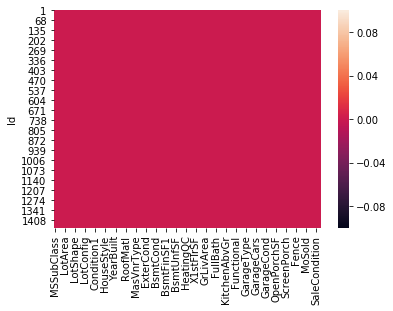

In [9]:
sns.heatmap(df.isnull())
plt.show()

In [10]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', '

In [11]:
saleprice=df['SalePrice']

In [12]:
df.drop(columns="SalePrice",inplace=True)

In [13]:
df.shape

(1460, 79)

In [14]:
newtrain=pd.get_dummies(df)

In [15]:
newtrain.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=288)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc=StandardScaler()

In [18]:
anothernewtrain=sc.fit_transform(newtrain)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [19]:
onemoretrain=pd.DataFrame(anothernewtrain)

In [20]:
onemoretrain.columns=newtrain.columns

In [21]:
finaltrain=onemoretrain

In [22]:
finaltrain.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [23]:
#Create a copy of Scaled Data
finaltrain2=finaltrain

In [24]:
#PCA
from sklearn.decomposition import PCA

In [25]:
pc=PCA(n_components=None)

In [26]:
finaltrain=pc.fit_transform(finaltrain2)

In [27]:
pc.explained_variance_ratio_[:120].sum()*100

82.10676890095287

In [28]:
# No of Components =120

pc=PCA(n_components=120)
finaltrain=pc.fit_transform(finaltrain2)


In [29]:
againfinaltrain = pd.DataFrame(finaltrain) # Convert it into a Dataframe

In [30]:
againfinaltrain.shape

(1460, 120)

In [31]:
againfinaltrain.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,4.278679,1.695952,-1.953484,1.983304,0.191251,-1.363508,0.761886,-0.494480,0.614808,-0.989449,...,-0.136188,0.318203,0.326747,0.100796,-0.102383,-0.726988,0.704941,-0.287403,0.202541,0.130667
1,0.034262,-3.325759,-0.728628,0.295209,0.367527,-0.569267,-0.875476,0.715993,0.618123,-1.259634,...,1.170886,0.282024,0.446704,-0.682264,0.172792,-1.287759,0.016913,-0.228151,0.291939,-0.837187
2,5.049839,0.716427,-1.182592,2.683121,0.751001,-2.127331,0.666901,-0.598840,1.065067,-1.381120,...,0.206041,-0.229661,-0.208932,-0.070198,0.173785,-1.054811,0.514467,0.903152,0.837282,-0.091234
3,-2.033667,1.076818,1.896305,1.354860,-0.650430,-0.972854,-2.335752,0.135328,-0.080138,0.988381,...,-0.572705,-1.203325,-1.608320,0.491341,0.210776,0.422123,0.301240,-0.745935,1.280344,1.275178
4,6.697157,0.234131,0.863586,3.892211,0.290482,-1.231516,0.955531,-1.637343,0.954815,-1.738951,...,0.563542,-0.123053,-0.097786,-1.380689,-0.234249,0.978286,-0.893951,0.497944,0.397557,0.836943


In [32]:
x=againfinaltrain
y=pd.DataFrame(saleprice)

In [33]:
y.shape

(1460, 1)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)
lr=LinearRegression()

In [36]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
from sklearn.ensemble import RandomForestRegressor
rm=RandomForestRegressor()
rm.fit(x,y)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
predict=lr.predict(x)

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y, predict))  
rmse                                              

27281.80515618952

In [40]:

test=pd.read_csv('housetest.csv')

In [41]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,Grvl,Reg,Lvl,AllPub,...,120,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,Grvl,IR1,HLS,AllPub,...,144,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal


In [42]:
ids=test['Id']

In [43]:
test.drop('Id',axis=1,inplace=True)

In [44]:
newtest=pd.get_dummies(test)

In [45]:
sc=StandardScaler()
anothernewtest=sc.fit_transform(newtest)
onemoretest=pd.DataFrame(anothernewtest)
onemoretest.columns=newtest.columns
finaltest=onemoretest
finaltest.head()

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.874711,0.567330,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063428,0.517537,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
1,-0.874711,0.615963,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063511,-0.297689,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
2,0.061351,0.275532,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773377,-0.297689,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
3,0.061351,0.470064,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.357958,-0.297689,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
4,1.465443,-1.232092,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.563316,-0.387160,-0.297689,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365


In [46]:
#Create a copy of Scaled Data
finaltest2=finaltest

In [47]:
pc=PCA(n_components=120)
finaltest=pc.fit_transform(finaltest)
againfinaltest = pd.DataFrame(finaltest)



In [48]:
x=againfinaltest

predict=lr.predict(x)
predict


predict2=rm.predict(x)
predict2

array([115210., 196250., 169045., ..., 160640., 139266., 179225.])

In [49]:

test["SalePrice"]=predict
test["Id"]=ids

In [50]:
test_file=test[["Id","SalePrice"]]
test_file.to_csv("Result.csv",index=False)

In [51]:
submit=pd.DataFrame({"Id":ids,"SalePrice":predict2})
submit.to_csv("finalResult.csv",index=False)